In [7]:
# Importer les bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [4]:
# Charger le jeu de données
'''path = "/home/onyxia/work/statapp_sujet26/"
#enlever work si nécessaire
file_name1 = "fichier_var_dummy.csv"

df = pd.read_csv(path+file_name1, sep=',',low_memory=False)

df['grav'] = df['grav'].replace({1:0,2:0,3:1,4:1})'''
# Charger le jeu de données
path = "/home/onyxia/work/statapp_sujet26/"

file_name1 = "dataset_complet_avec_dummies_part_1.csv"
file_name2 = "dataset_complet_avec_dummies_part_2.csv"
file_name3 = "dataset_complet_avec_dummies_part_3.csv"
file_name4 = "dataset_complet_avec_dummies_part_4.csv"
df1 = pd.read_csv(path+file_name1, sep=',',low_memory=False)
df2 = pd.read_csv(path+file_name2, sep=',',low_memory=False)
df3 = pd.read_csv(path+file_name2, sep=',',low_memory=False)
df4 = pd.read_csv(path+file_name2, sep=',',low_memory=False)
df = pd.concat([df1,df2,df3,df4])

#file_name = "fichier_var_dummy.csv"


df['grav'] = df['grav'].replace({1:0,2:0,3:1,4:1})

In [5]:
y = df['grav']
X = df.drop(columns=['grav'])
features = X.columns

#print(X.head())
#print(y.head())
#print(features)

In [9]:
# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir les hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [450, 500, 550],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le modèle Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Initialiser StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser GridSearchCV avec le modèle, la grille de paramètres et StratifiedKFold
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=k_fold, scoring='f1')

# Exécuter la recherche sur la grille
grid_search_rf.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs Paramètres:", grid_search_rf.best_params_)
print("Meilleur Score:", grid_search_rf.best_score_)

model_rf = grid_search_rf.best_estimator_




Meilleurs Paramètres: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 400}
Meilleur Score: 0.8553644246243424


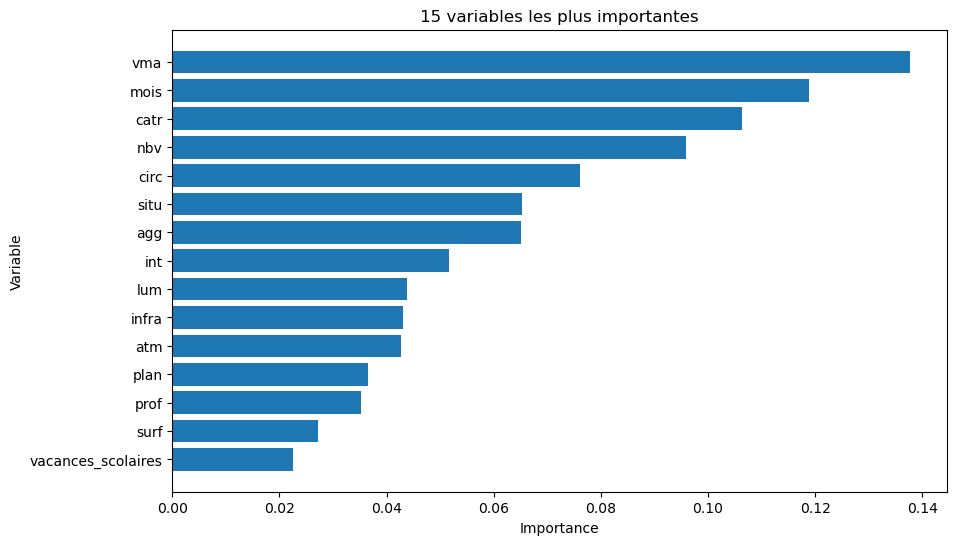

In [23]:
model = grid_search_f1.best_estimator_
# Obtenir l'importance des variables à partir du modèle entraîné
importance = model.feature_importances_

# Créer un dictionnaire pour stocker l'importance de chaque variable avec son nom
feature_importance_dict = dict(zip(features, importance))

# Trier les variables par importance et sélectionner les 15 premières
top_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:15]

# Extraire les noms des 15 variables les plus importantes
top_feature_names = [feature[0] for feature in top_features]
top_importance = [feature[1] for feature in top_features]

# Tracer l'importance des 15 variables les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_importance)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('15 variables les plus importantes')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir la variable la plus importante en haut


plt.show()


In [24]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("Score F1 sur l'ensemble de test:", f1)

Score F1 sur l'ensemble de test: 0.5924832214765101


In [25]:
def graph(model, param_name, param_range):
    # Calculer les scores d'entraînement et de validation à travers la plage de valeurs de l'hyperparamètre
    train_scores, valid_scores = validation_curve(model, X_train, y_train, param_name=param_name, param_range=param_range, cv=k_fold, scoring='f1')

    # Calculer les scores moyens et les écarts-types pour les scores d'entraînement et de validation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    # Tracer les courbes de validation
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Score d\'entraînement')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(param_range, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Score de validation')
    plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Valeur de ' + param_name)
    plt.ylabel('Score F1')
    plt.legend(loc='lower right')
    plt.title('Courbes de validation')
    plt.show()


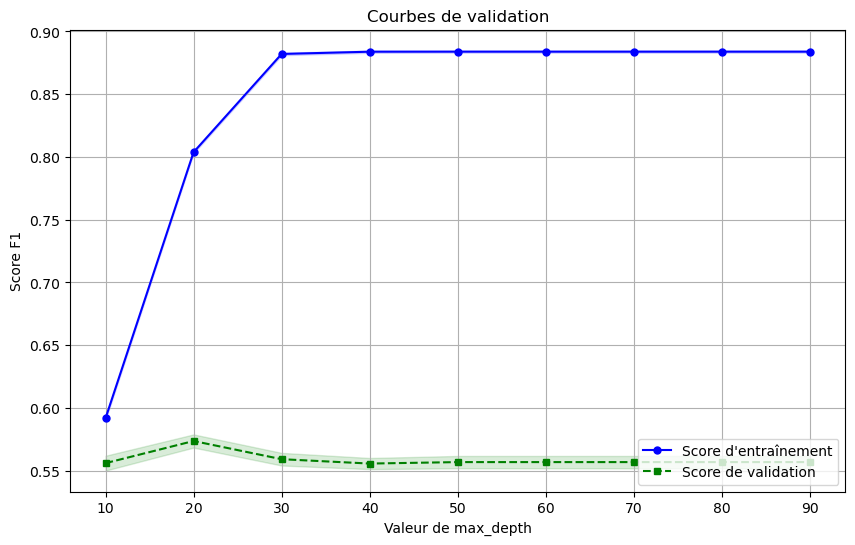

In [26]:
graph(model=RandomForestClassifier(random_state=42), param_name='max_depth', param_range=range(10,100,10))

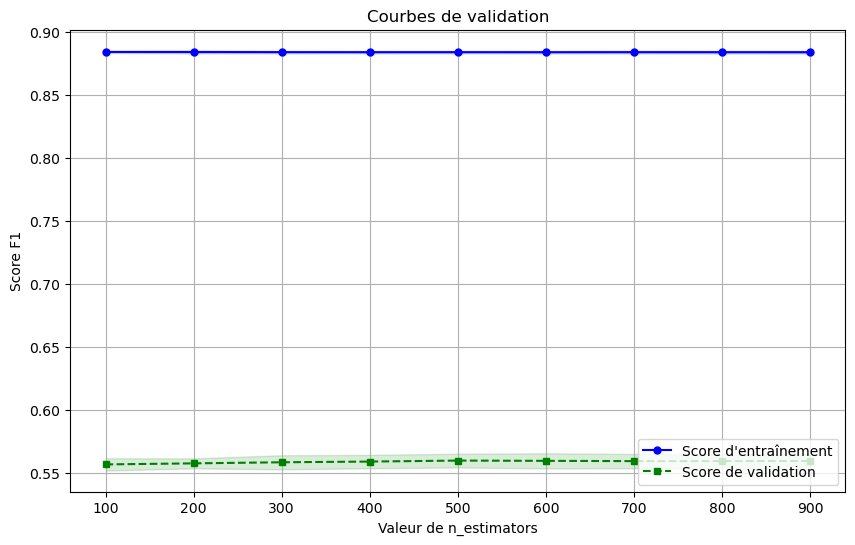

In [27]:
graph(model=RandomForestClassifier(random_state=42), param_name='n_estimators', param_range=range(100,1000,100))

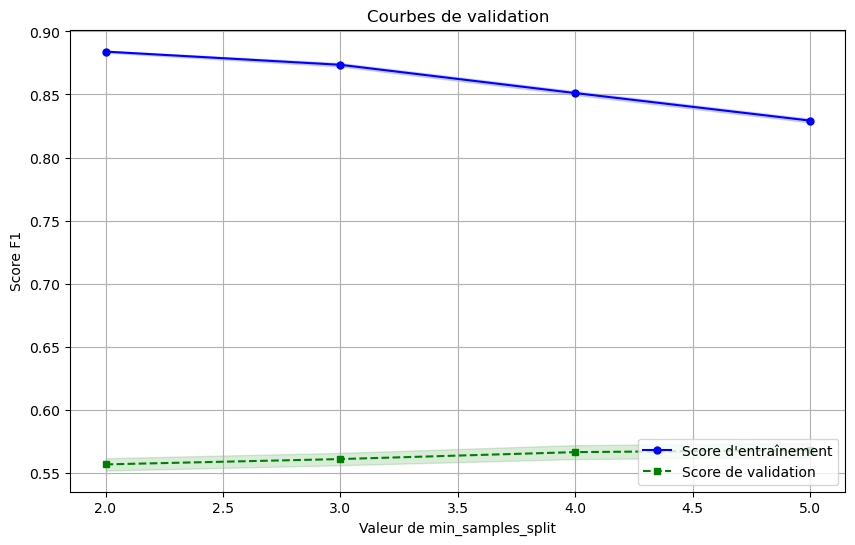

In [28]:
graph(model=RandomForestClassifier(random_state=42), param_name='min_samples_split', param_range=range(0,6,1))

In [34]:

model = RandomForestClassifier(max_depth=40, min_samples_split = 2, n_estimators=400, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("Score F1 sur l'ensemble de test:", f1)

Score F1 sur l'ensemble de test: 0.8809760956175299
